<a href="https://colab.research.google.com/github/elsms/University-Projects/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Dataset introduction and preparation

Here, we load the **ANES 2020 Time Series Survey** dataset along with a separate response dataset containing two responses extracted from the first dataset, which we will use in our analysis.

In [ ]:
# Loading the dataset containg the regressors we're going to use
regressors=pd.read_csv("Time_series_2020.csv", low_memory=False)
# Loading the dataset containg the two responses
df_y=pd.read_excel("Response.xlsx")

In [ ]:
# Defining the variables to work with

'''

LIST OF THE VARIABLES TO BE KEPT

- V203000 = sample location state
- V201016 = duration of registration in that state
- V201127 = is Trump doing a good job?
- V201130 = is Trump handling the economy well?
- V201133 = how is Trump handling foreign relations?
- V201136 = how is Trump handling healthcare?
- V201139 = how is Trump handling immigration?
- V201142 = disapprove or approve how Trump is handling the pandemic

- V201300 = federal budget spending on social security
- V201303 = federal budget spending on public schools
- V201306 = federal budget spending on tightening border security
- V201309 = federal budget spending on dealing with crime
- V201312 = federal budget spending on welfare programs
- V201318 = federal budget spending on aid to the poor
- V201321 = federal budget spending on protecting the environment
- V201324 = current economy: good or bad?
- V201328 = economy better or worse in next 12 months
- V201331 = unemployment better or worse in last year
- V201334 = more or less unemployment in next year
- V201350 = more or less spending in solving international problems
- V201351 = are votes gonna be counted accurately during the 2020 general election?
- V201352 = how much do you trust the officials who oversee elections where you live?
- V201360 = do you favor or oppose allowing convicted felons to vote once they complete their sentence?
- V201377 = how much trust in media when it comes to reporting the news fully, accurately and fairly
- V201380 = corruction increased or decreased since Trump

- V201554 = what country were you born in?
- V201596 = anyone lost their jobs in the past 12 months (family or close friends?)
- V201603: compared to 4 years ago, do you think political violence used to pursue political goals has:
- V201617x: total family income

'''

variables=['V203000','V201016','V201127','V201130','V201133','V201136','V201139','V201142',

           'V201300','V201303','V201306','V201309','V201312','V201318','V201321','V201324','V201328','V201331',
           'V201334','V201350','V201351','V201352','V201360','V201377','V201380',

           'V201554','V201596','V201603','V201617x']

df_x=regressors[variables]
df_x=df_x.rename(columns={'V203000':'State_cod'})
# df_x

In [ ]:
# Merging df_x and df_y
df=pd.merge(df_x,df_y,left_index=True,right_index=True,how='inner')
df

,State_cod,V201016,V201127,V201130,V201133,V201136,V201139,V201142,V201300,V201303,...,V201352,V201360,V201377,V201380,V201554,V201596,V201603,V201617x,Pref_President,Pref_Party
0,40,3,1,1,1,1,1,1,3,2,...,3,2,1,2,4,1,1,21,2,1
1,16,3,2,1,2,1,2,2,3,1,...,2,2,1,3,1,1,1,13,3,1
2,51,3,2,2,2,2,2,2,1,1,...,4,1,3,1,1,2,3,17,1,0
3,6,3,2,2,2,2,2,2,3,1,...,4,1,4,1,4,2,1,7,1,1
4,8,2,1,1,1,2,1,2,3,2,...,2,1,2,1,1,2,1,22,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,12,1,1,1,1,1,1,1,1,1,...,2,1,1,1,4,2,1,8,2,1
8276,16,3,1,1,2,1,1,1,1,1,...,5,1,2,3,4,1,1,19,2,-1
8277,6,2,2,2,2,2,2,2,3,1,...,3,1,3,1,4,1,1,16,1,-1
8278,51,3,1,1,1,1,1,1,1,1,...,3,2,1,2,1,2,1,14,-1,1


# Encoding the variables

In [ ]:
# Encoding the variables

'''

Recall the regressors included in our dataset "df"

variables=['State_cod','V201016','V201127','V201130','V201133','V201136','V201139','V201142',

          'V201300','V201303','V201306','V201309','V201312','V201318','V201321','V201324','V201328','V201331',
           'V201334','V201350','V201351','V201352','V201360','V201377','V201380',

           'V201554','V201596','V201603','V201617x']
'''

# Function to be used with V201016
def coding_location(val):
  if val == 1:
    return 1 #0-1 years
  elif val == 2:
    return 2 # 2-5 years
  elif val == 3:
      return 3 #5 years or more
  else:
    return 0 #Inapplicable

df['V201016'] = df['V201016'].apply(coding_location)

###########################

# Function to be used for V201127, V201130, V201133, V201136, V201139, V201142
def coding_handling_job(val):
  if val == 1:
    return 1 #Approve
  elif val == 2:
    return 2 #Disapprove
  else:
    return 0 #Inapplicable

df['V201127'] = df['V201127'].apply(coding_handling_job)
df['V201130'] = df['V201130'].apply(coding_handling_job)
df['V201133'] = df['V201133'].apply(coding_handling_job)
df['V201136'] = df['V201136'].apply(coding_handling_job)
df['V201139'] = df['V201139'].apply(coding_handling_job)
df['V201142'] = df['V201142'].apply(coding_handling_job)


###################################à

# Function to be used for V201300, V201303, V201306, V201309, V201312, V201318, V201321, V201380, V201603
def coding_approval_disapproval(val):
  if val == 1:
    return 1 #Increased
  elif val == 2:
    return 2 #Decreased
  elif val == 3:
    return 3 #Kept the same
  else:
    return 0 #Inapplicable

df['V201300'] = df['V201300'].apply(coding_approval_disapproval)
df['V201303'] = df['V201303'].apply(coding_approval_disapproval)
df['V201306'] = df['V201306'].apply(coding_approval_disapproval)
df['V201309'] = df['V201309'].apply(coding_approval_disapproval)
df['V201312'] = df['V201312'].apply(coding_approval_disapproval)
df['V201318'] = df['V201318'].apply(coding_approval_disapproval)
df['V201321'] = df['V201321'].apply(coding_approval_disapproval)
df['V201380'] = df['V201380'].apply(coding_approval_disapproval)
df['V201603'] = df['V201603'].apply(coding_approval_disapproval)

#######################################

# Function to be used for V201324
def coding_good(val):
  if val == 1 or val == 2:
    return 1 #Good
  elif val == 4 or val == 5:
    return 2 #Bad
  elif val == 3:
    return 3 #Neither good nor bad
  else:
    return 0 #Inapplicable

df['V201324'] = df['V201324'].apply(coding_good)

#######################################

# Function to be used for V201328, V201331
def coding_get_better(val):
  if val == 1:
    return 1 #Get better
  elif val == 3:
    return 2 #Get worse
  elif val == 2:
    return 3 #Stay about the same
  else:
    return 0 #Inapplicable

df['V201328'] = df['V201328'].apply(coding_get_better)
df['V201331'] = df['V201331'].apply(coding_get_better)

###################################

# Function to be used for V201334
def coding_more(val):
  if val == 1:
    return 1 #More
  elif val == 3:
    return 2 #Less
  elif val == 2:
    return 3 #About the same
  else:
    return 0 #Inapplicable

df['V201334'] = df['V201334'].apply(coding_more)

#######################################

# Function to be used for V201350
def coding_willing(val):
  if val == 1 or val == 2:
    return 1 #Willing
  elif val == 5:
    return 2 #Not willing
  elif val == 3 or val == 4:
    return 3 #Moderately willing
  else:
    return 0 #Inapplicable

df['V201350'] = df['V201350'].apply(coding_willing)

###################################

# Function to be used for V201351
def coding_accurate(val):
  if val == 1:
    return 2 #Not at all accurately
  elif val == 2 or val == 3:
    return 3 #Moderately accurately
  elif val == 4 or val == 5:
    return 1 #Accurately
  else:
    return 0 #Inapplcable

df['V201351'] = df['V201351'].apply(coding_accurate)

#########################################

# Functions to be used for V201352, V201377
def coding_moderate(val):
  if val == 1:
    return 2 #Not at all
  elif val == 2 or val == 3:
    return 3 #A moderate amount
  elif val == 4 or val == 5:
    return 1 #A lot
  else:
    return 0 #Inapplicable

df['V201352'] = df['V201352'].apply(coding_moderate)
df['V201377'] = df['V201377'].apply(coding_moderate)

#####################################

# Function to be used for V201360
def coding_opposing(val):
  if val == 1:
    return 1 #Favor
  elif val == 2:
    return 2 #Oppose
  elif val == 3:
    return 3 #Neither favor nor oppose
  else:
    return 0 #Inapplicable

df['V201360'] = df['V201360'].apply(coding_opposing)

#########################################

# Function to be used with V201554
def coding_born(val):
  if val == 1:
    return 1 #'A US state or Washington D.C.
  elif val == 2:
    return 2 #Puerto Rico
  elif val == 3:
    return 3 #Another US territory
  elif val == 4:
    return 4 #Another country
  else:
    return 0 #Inapplicable

df['V201554'] = df['V201554'].apply(coding_born)

##################################

# Function to be applied with V201596
def coding_job(val):
  if val == 1:
    return 1 #Someone lost a job
  elif val == 2:
    return 2 #No one lost a job
  else:
    return 0 #Inapplicable

df['V201596'] = df['V201596'].apply(coding_job)

################################

# Function to be applied with V201617x
def coding_income(val):
  if val == 1 or val == 2:
    return 1 #Less than $15,000
  elif val == 3 or val == 4 or val == 5 or val == 6:
    return 2 #$15,000 to $34,999
  elif val == 7 or val == 8 or val == 9:
    return 3 #$35,000 to $49,999
  elif val == 10 or val == 1 or val == 12:
    return 4 #$50,000 to $69,999
  elif val == 13 or val == 14 or val == 15:
    return 5 #$70,000 to $89,999
  elif val == 16 or val == 17:
    return 6 #$90,000 to 109,999
  elif val == 18 or val == 19:
    return 7 #$110,000 to $149,999
  elif val == 20:
    return 8 #$150,000 to $174,999
  elif val == 21:
    return 9 #$175,000 to $249,999
  elif val == 22:
    return 10 #$250,000 or more
  else:
    return 0 #Inapplicable

df['V201617x'] = df['V201617x'].apply(coding_income)


####################################
# Function to be applied with Pref_President
def coding_president(val):
  if val == 1:
    return 1 #Joe Biden
  elif val == 2:
    return 2 #Donald Trump
  elif val == 3 or val == 4 or val == 5:
    return 3 #Jo Jorgensen, Howie Hawkins and other candidates
  else:
    return 0 #Inapplicable'

df['Pref_President'] = df['Pref_President'].apply(coding_president)

###############################
# Function to be applied to Pref_Party
def coding_party(val):
  if val == 0:
    return 1 #Democratic
  elif val == 1:
    return 2 #Republican
  elif val == 2:
    return 3 #Other candidate
  else:
    return 0 #Inapplicable

df['Pref_Party'] = df['Pref_Party'].apply(coding_party)

In [ ]:
df

,State_cod,V201016,V201127,V201130,V201133,V201136,V201139,V201142,V201300,V201303,...,V201352,V201360,V201377,V201380,V201554,V201596,V201603,V201617x,Pref_President,Pref_Party
0,40,3,1,1,1,1,1,1,3,2,...,3,2,3,2,4,1,1,3,2,3
1,16,3,2,1,2,1,2,2,3,1,...,3,2,3,3,1,1,1,2,3,3
2,51,3,2,2,2,2,2,2,1,1,...,2,1,3,1,1,2,3,2,1,2
3,6,3,2,2,2,2,2,2,3,1,...,2,1,2,1,4,2,1,2,1,3
4,8,2,1,1,1,2,1,2,3,2,...,3,1,3,1,1,2,1,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,12,1,1,1,1,1,1,1,1,1,...,3,1,3,1,4,2,1,2,2,3
8276,16,3,1,1,2,1,1,1,1,1,...,2,1,3,3,4,1,1,3,2,1
8277,6,2,2,2,2,2,2,2,3,1,...,3,1,3,1,4,1,1,2,1,1
8278,51,3,1,1,1,1,1,1,1,1,...,3,2,3,2,1,2,1,2,0,3


In [ ]:
# print(df.dtypes)
# Convert each column to 'category' type
categorical_columns = ['State_cod', 'V201016', 'V201127', 'V201130', 'V201133', 'V201136', 'V201139', 'V201142',
                       'V201300', 'V201303', 'V201306', 'V201309', 'V201312', 'V201318', 'V201321', 'V201324',
                       'V201328', 'V201331', 'V201334', 'V201350', 'V201351', 'V201352', 'V201377', 'V201360',
                       'V201554', 'V201596', 'V201617x', 'Pref_President', 'Pref_Party']

df[categorical_columns] = df[categorical_columns].apply(lambda x: x.astype('category'))

print(df.dtypes)

State_cod         category
V201016           category
V201127           category
V201130           category
V201133           category
V201136           category
V201139           category
V201142           category
V201300           category
V201303           category
V201306           category
V201309           category
V201312           category
V201318           category
V201321           category
V201324           category
V201328           category
V201331           category
V201334           category
V201350           category
V201351           category
V201352           category
V201360           category
V201377           category
V201380              int64
V201554           category
V201596           category
V201603              int64
V201617x          category
Pref_President    category
Pref_Party        category
dtype: object


In [ ]:
# Dataframe considering just the response Pref_President
df_President = df.drop(['Pref_Party'], axis = 1)
df_President

,State_cod,V201016,V201127,V201130,V201133,V201136,V201139,V201142,V201300,V201303,...,V201351,V201352,V201360,V201377,V201380,V201554,V201596,V201603,V201617x,Pref_President
0,40,3,1,1,1,1,1,1,3,2,...,3,3,2,2,2,4,1,1,9,2
1,16,3,2,1,2,1,2,2,3,1,...,3,3,2,2,3,1,1,1,5,3
2,51,3,2,2,2,2,2,2,1,1,...,3,1,1,3,1,1,2,3,6,1
3,6,3,2,2,2,2,2,2,3,1,...,1,1,1,1,1,4,2,1,3,1
4,8,2,1,1,1,2,1,2,3,2,...,3,3,1,3,1,1,2,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,12,1,1,1,1,1,1,1,1,1,...,1,3,1,2,1,4,2,1,3,2
8276,16,3,1,1,2,1,1,1,1,1,...,3,1,1,3,3,4,1,1,7,2
8277,6,2,2,2,2,2,2,2,3,1,...,1,3,1,3,1,4,1,1,6,1
8278,51,3,1,1,1,1,1,1,1,1,...,2,3,2,2,2,1,2,1,5,0


In [ ]:
# Dataframe considering just the response Pref_Party
df_Party = df.drop(['Pref_President'], axis = 1)
df_Party

,State_cod,V201016,V201127,V201130,V201133,V201136,V201139,V201142,V201300,V201303,...,V201351,V201352,V201360,V201377,V201380,V201554,V201596,V201603,V201617x,Pref_Party
0,40,3,1,1,1,1,1,1,3,2,...,3,3,2,2,2,4,1,1,9,2
1,16,3,2,1,2,1,2,2,3,1,...,3,3,2,2,3,1,1,1,5,2
2,51,3,2,2,2,2,2,2,1,1,...,3,1,1,3,1,1,2,3,6,1
3,6,3,2,2,2,2,2,2,3,1,...,1,1,1,1,1,4,2,1,3,2
4,8,2,1,1,1,2,1,2,3,2,...,3,3,1,3,1,1,2,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,12,1,1,1,1,1,1,1,1,1,...,1,3,1,2,1,4,2,1,3,2
8276,16,3,1,1,2,1,1,1,1,1,...,3,1,1,3,3,4,1,1,7,0
8277,6,2,2,2,2,2,2,2,3,1,...,1,3,1,3,1,4,1,1,6,0
8278,51,3,1,1,1,1,1,1,1,1,...,2,3,2,2,2,1,2,1,5,2


In [ ]:
df_President['Pref_President'].unique()
#df_Party['Pref_Party'].unique()

array([2, 3, 1, 0])

# Investigating variables correlation

In this section, we computed a Cramér's V matrix to investigate the relationships among our categorical inputs, with values closer to 1 indicating stronger relationships. Additionally, we calculated the Variance Inflation Factor (VIF) to check for multicollinearity among predictors. A VIF greater than 5 suggests high collinearity, which may require addressing to ensure model stability.

In [ ]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
#df.head()
df.columns

Index(['State_cod', 'V201016', 'V201127', 'V201130', 'V201133', 'V201136',
       'V201139', 'V201142', 'V201300', 'V201303', 'V201306', 'V201309',
       'V201312', 'V201318', 'V201321', 'V201324', 'V201328', 'V201331',
       'V201334', 'V201350', 'V201351', 'V201352', 'V201360', 'V201377',
       'V201380', 'V201554', 'V201596', 'V201603', 'V201617x',
       'Pref_President', 'Pref_Party'],
      dtype='object')

In [ ]:
# Remove the responses from df
df_Cramer = df.drop(['Pref_President', 'Pref_Party'], axis=1)

def cramers_v(x, y):
    """Calculate Cramér's V statistic for two categorical variables with error handling."""
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape

    phi2_corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    r_corr = max(1, r - ((r-1)**2) / (n-1))  # prevent zero correction
    k_corr = max(1, k - ((k-1)**2) / (n-1))  # prevent zero correction

    denominator = min(r_corr-1, k_corr-1)
    if denominator <= 0:
        return 0  # return 0 when the denominator is zero or negative

    return np.sqrt(phi2_corr / denominator)

# Generate the Cramér's V matrix
def cramers_v_matrix(df):
    """Generate a Cramér's V correlation matrix for a DataFrame."""
    cols = df.columns
    matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)

    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                matrix.loc[col1, col2] = 1.0
            else:
                try:
                    matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
                except ValueError:
                    matrix.loc[col1, col2] = np.nan
    return matrix

cramers_matrix = cramers_v_matrix(df_Cramer)
#print(cramers_matrix)

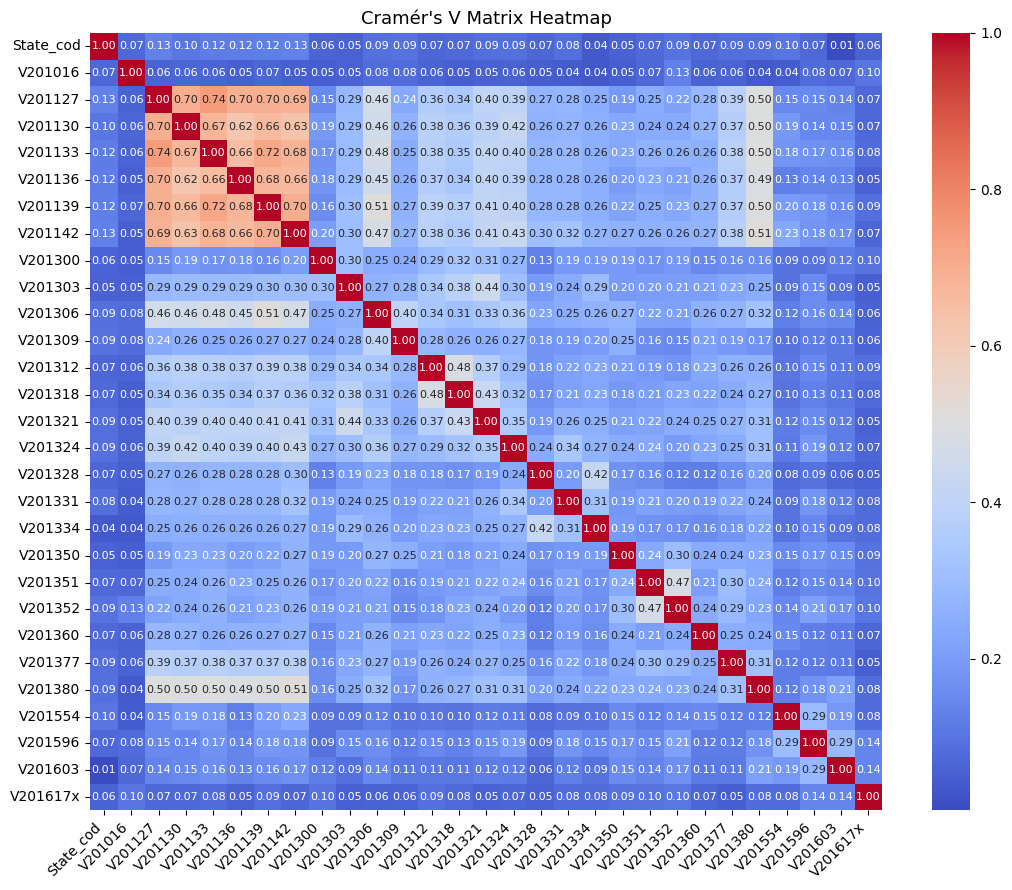

In [ ]:
# Visualize the matrix
plt.figure(figsize=(11, 9))
sns.heatmap(cramers_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            annot_kws={"size": 8})  # reduces font size of annotations
plt.xticks(rotation=45, ha='right') # rotates x-axis labels
plt.title("Cramér's V Matrix Heatmap", fontsize=13)
plt.tight_layout()  # adjusts layout to avoid clipping


'''
- V201127 = is Trump doing a good job?
- V201130 = is Trump handling the economy well?
- V201133 = how is Trump handling foreign relations?
- V201136 = how is Trump handling healthcare?
- V201139 = how is Trump handling immigration?
- V201142 = disapprove or approve how Trump is handling the pandemic

- V201300 = federal budget spending on social security
- V201303 = federal budget spending on public schools
- V201306 = federal budget spending on tightening border security
- V201309 = federal budget spending on dealing with crime
- V201312 = federal budget spending on welfare programs
- V201318 = federal budget spending on aid to the poor
- V201321 = federal budget spending on protecting the environment
'''

plt.show()

We observe a strong correlation between *V201127*, *V201130*, *V201133*, *V201136*, *V201139*, and *V201142*. This is reasonable, as these variables reflect various aspects of Trump's approval ratings on different issues. Their correlations may stem from shared underlying factors.

In [ ]:
# Computing the VIF factor to address potential multicollinearity

# Add a constant for the intercept
X = add_constant(df_Party[['V201127', 'V201130', 'V201133', 'V201136', 'V201139', 'V201142']])
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Removing V201127 from the dataframes
df_Party.drop('V201127', axis=1, inplace=True)
df_President.drop('V201127', axis=1, inplace=True)

  Variable        VIF
0    const  12.882909
1  V201127   5.680028
2  V201130   3.138071
3  V201133   4.583188
4  V201136   3.645074
5  V201139   3.845255
6  V201142   3.596304


In [ ]:
df_Party.head()
df_President.head()

,State_cod,V201016,V201130,V201133,V201136,V201139,V201142,V201300,V201303,V201306,...,V201351,V201352,V201360,V201377,V201380,V201554,V201596,V201603,V201617x,Pref_President
0,40,3,1,1,1,1,1,3,2,1,...,3,3,2,2,2,4,1,1,9,2
1,16,3,1,2,1,2,2,3,1,3,...,3,3,2,2,3,1,1,1,5,3
2,51,3,2,2,2,2,2,1,1,2,...,3,1,1,3,1,1,2,3,6,1
3,6,3,2,2,2,2,2,3,1,3,...,1,1,1,1,1,4,2,1,3,1
4,8,2,1,1,2,1,2,3,2,1,...,3,3,1,3,1,1,2,1,10,2


We can remove the feature *V201127* as its VIF exceeds the common threshold of 5 (or 10), indicating a high level of multicollinearity.

In [ ]:
# Recompute the VIF values
X = add_constant(df_Party[['V201130', 'V201133', 'V201136', 'V201139', 'V201142']])
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Variable        VIF
0    const  12.879575
1  V201130   2.990984
2  V201133   4.071465
3  V201136   3.475840
4  V201139   3.732626
5  V201142   3.296587


# Multivariate logistic regression

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

'''

LIST OF VARIABLES TO BE KEPT

- State_cod
- V201016 = duration of registration
- V201130 = is Trump handling the economy well?
- V201133 = how is Trump handling foreign relations?
- V201136 = how is Trump handling healthcare?
- V201139 = how is Trump handling immigration?
- V201142 = disapprove or approve how Trump is handling the pandemic

- V201300 = federal budget spending on social security
- V201303 = federal budget spending on public schools
- V201306 = federal budget spending on tightening border security
- V201309 = federal budget spending on dealing with crime
- V201312 = federal budget spending on welfare programs
- V201318 = federal budget spending on aid to the poor
- V201321 = federal budget spending on protecting the environment
- V201324 = current economy: good or bad?
- V201328 = economy better or worse in next 12 months
- V201331 = unemployment better or worse in last year
- V201334 = more or less unemployment in next year
- V201350 = more or less spending in solving international problems
- V201351 = are votes gonna be counted accurately during the 2020 general election?
- V201352 = how much do you trust the officials who oversee elections where you live?
- V201360 = do you favor or oppose allowing convicted felons to vote once they complete their sentence?
- V201377 = how much trust in media when it comes to reporting the news fully, accurately and fairly
- V201380 = corruction increased or decreased since Trump

- V201554 = what country were you born in?
- V201596 = anyone lost their jobs in the past 12 months (family or close friends?)
- V201603: compared to 4 years ago, do you think political violence used to pursue political goals has...
- V201617x: total family income

'''

vars=['State_cod','V201016','V201130','V201133','V201136','V201139','V201142',

           'V201300','V201303','V201306','V201309','V201312','V201318','V201321','V201324','V201328','V201331',
           'V201334','V201350','V201351','V201352','V201360','V201377','V201380',

           'V201554','V201596','V201603','V201617x']

#### Multivariate logistic regression for *df_Party*

In [ ]:
df_Party['Pref_Party'] = pd.Categorical(df_Party['Pref_Party'], categories=[0, 1, 2, 3], ordered=True)
# setting 'inapplicable' (class 0) as the baseline
# this way, the model would assess how the other classes differ from those who did not respond

X1 = df_Party.drop('Pref_Party', axis=1)
y1 = df_Party['Pref_Party']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

# Standardize the regressors so they have zero mean and variance = 1
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

# Add the intercept beta0
X1_train = sm.add_constant(X1_train)

# Train multivariate logistic regression using the training data
model = sm.MNLogit(y1_train, X1_train)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.881454
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:             Pref_Party   No. Observations:                 6624
Model:                        MNLogit   Df Residuals:                     6537
Method:                           MLE   Df Model:                           84
Date:                Thu, 09 Jan 2025   Pseudo R-squ.:                  0.2629
Time:                        19:26:14   Log-Likelihood:                -5838.7
converged:                       True   LL-Null:                       -7921.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
Pref_Party=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4746      0.045     10.546      0.000       0.386       0.563
x1              -0.0291

In [ ]:
# Evaluate model performance using classification report (only reflects the test test)
X1_test = sm.add_constant(X1_test)  # add a constant to the test set
y1_pred_prob = result.predict(X1_test)  # get the predicted probabilities
y1_pred = np.argmax(y1_pred_prob, axis=1)  # get the predicted class by taking the max probability for each row
print("Classification Report:")
print(classification_report(y1_test, y1_pred))

# Accuracy is the ratio of the number of correct predictions to the total number of predictions
# Precision is the ratio of correctly predicted positive observations to the total predicted positives
# Recall (also called Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to all observations in the actual class
# The F1-score is the harmonic mean of precision and recall. It gives a balance between precision and recall
# Support is the number of actual occurrences of the class in the dataset. It tells you how many samples there are for each class.
# The macro average calculates the average of the metric (precision, recall, F1-score) for each class, treating all classes equally (without taking the class distribution into account).
# The weighted average takes into account the support (class frequency) when calculating the average for each metric. It's a weighted mean where larger classes contribute more to the final score.

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.36      0.45       336
           1       0.71      0.84      0.77       696
           2       0.68      0.76      0.72       561
           3       0.00      0.00      0.00        63

    accuracy                           0.68      1656
   macro avg       0.50      0.49      0.48      1656
weighted avg       0.65      0.68      0.66      1656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The **classification report** provides a clear view of the model's performance across each response class.


*   **Class 0** -> The model has a precision of 61%, meaning it is 61% correct when predicting class 0. However, its recall is lower at 36%, indicating that it misses a significant portion of actual class 0 samples.
*   **Class 1** -> The model has a precision of 71%, meaning it is 71% correct when predicting this class. It also correctly identifies 84% of the actual class 1 observations, showing a strong ability to detect Democratic preferences. The high F1-score of 0.77 suggests a solid balance between precision and recall for this category, indicating the model is effective at distinguishing Democratic preferences.
*   **Class 2** -> The model has a precision of 68%, meaning it is 68% correct when predicting class 2. It correctly identifies 76% of the actual class 2 observations, suggesting that the model is good at detecting Republican preferences. The strong F1-score of 0.72 confirms that the model effectively distinguishes Republican preferences as well.
*   **Class 3** -> The model fails to predict any observations for this class, with a precision, recall, and F1-score of 0. This suggests the model is struggling with class 3, likely due to class imbalance, as this category is rare.

Since we are more interested in the more frequent classes (Democratic and Republican), it is encouraging to see that the weighted average recall is 68%, and the weighted average F1-score is 66%. These metrics suggest that the model is performing well overall, as they give more weight to the larger, more frequent classes (1 and 2).





In [ ]:
# Class 3 is not predicted at all > let's try adding class weights

class_weights = {1: 1, 2: 1, 3: 5}
weights = y1_train.map(class_weights)

# Fit the model with the weights
model = sm.MNLogit(y1_train, X1_train)
result = model.fit(weights=weights)
#print(result.summary())

# Print again the classification report
probabilities = result.predict(X1_train)
predicted_classes = np.argmax(probabilities, axis=1) + 1  # get the predicted class by selecting the class with the maximum probability
print(classification_report(y1_train, predicted_classes))

/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol, ridge_factor. The list of unsupported keyword arguments passed include: weights. After release 0.14, this will raise.
  warnings.warn(


Optimization terminated successfully.
         Current function value: 0.881454
         Iterations 7
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1390
           1       0.20      0.06      0.09      2666
           2       0.11      0.16      0.13      2285
           3       0.04      0.35      0.07       283

    accuracy                           0.10      6624
   macro avg       0.09      0.14      0.07      6624
weighted avg       0.12      0.10      0.09      6624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


It appears that the model's predictions are more reliable without class weights, particularly when considering the overall distribution of classes. Therefore, we will not take class weights into account.

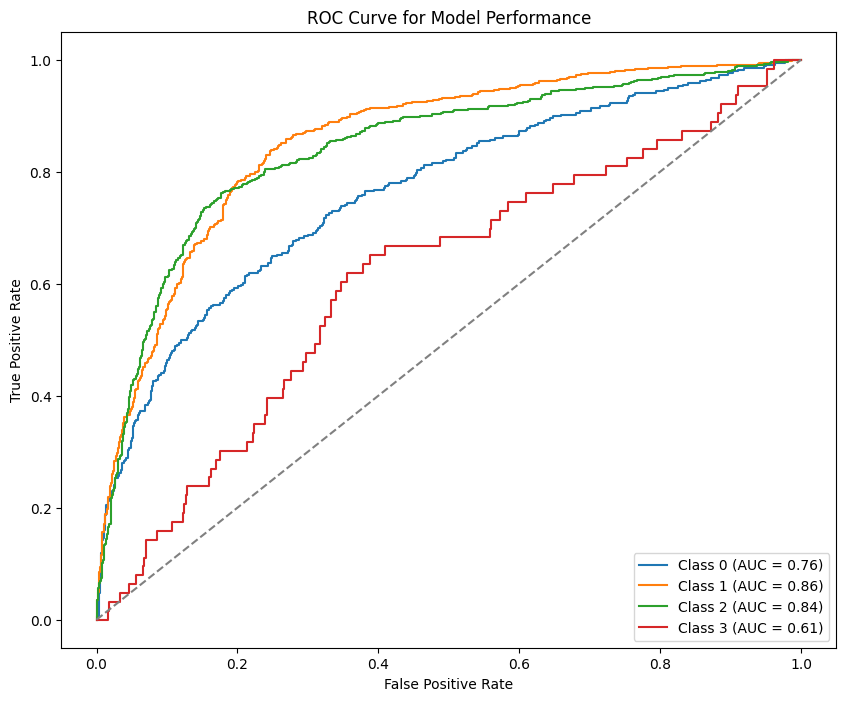

In [ ]:
# Let's compute the ROC curve

# Predict probabilities on test set
y_prob = result.predict(X1_test)

# Binarize the target for ROC curve computation
y1_test_bin = label_binarize(y1_test, classes=[0, 1, 2, 3])

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y1_test_bin.shape[1]

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y1_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the baseline diagonal
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model Performance')
plt.legend(loc="lower right")
plt.show()

The results above confirm what we already knew: the model performs well in distinguishing observations from classes 1 and 2 (AUC = 0.86 and AUC = 0.84, respectively). For class 0 (AUC = 0.76), the performance is acceptable but not as strong as for classes 1 and 2. However, for class 3 (AUC = 0.61), the model struggles to distinguish this class from the others, performing only slightly better than random guessing.

In [ ]:
# The following results represent the probabilities of each observation (row) in df_Party belonging to each of the three response classes

name_mapping = {'x1':'State_cod', 'x2':'V201016', 'x3':'V201130', 'x4':'V201133', 'x5':'V201136', 'x6':'V201139', 'x7':'V201142',
                'x9':'V201303', 'x10':'V201306', 'x11':'V201309', 'x13':'V201318', 'x14':'V201321', 'x15':'V201324',
                'x16':'V201328', 'x19':'V201351', 'x20':'V201351', 'x21':'V201352', 'x22':'V201360', 'x23':'V201377', 'x24':'V201380',
                'x25':'V201554', 'x27':'V201603', 'x28':'V201617x'}

# Significant predictors for each class based on p-values < 0.5
significant_vars_class1 = ['x2', 'x3', 'x5', 'x6', 'x9', 'x11', 'x15', 'x19', 'x21', 'x22', 'x23', 'x28']
significant_vars_class2 = ['x2', 'x6', 'x7', 'x10', 'x13', 'x14', 'x15', 'x16', 'x20', 'x21', 'x24', 'x25', 'x27', 'x28']

# Retrieve the indices of the significant variables in df_Party
significant_vars_class1_indices = [list(df_Party.columns).index(name_mapping[var]) for var in significant_vars_class1]
significant_vars_class2_indices = [list(df_Party.columns).index(name_mapping[var]) for var in significant_vars_class2]

# Now, use the indices to access the data in the NumPy array
X_significant_class1 = X1_train[:, significant_vars_class1_indices]
X_significant_class2 = X1_train[:, significant_vars_class2_indices]

# Calculate log-odds for each class using the significant variables
#The line below is changed to select the correct parameters from result.params based on the significant variables for each class
log_odds_1 = result.params[1][significant_vars_class1_indices] @ X_significant_class1.T  # Log-odds for class 1
log_odds_2 = result.params[2][significant_vars_class2_indices] @ X_significant_class2.T  # Log-odds for class 2
#log_odds_3 = result.params[0][significant_vars_class3_indices] @ X_significant_class3.T  # Log-odds for class 3

# Stack the log-odds for the three classes together, including a baseline for Pref_Party=0 ('Inapplicable')
log_odds_all = np.column_stack([np.zeros(X_significant_class1.shape[0]), log_odds_1, log_odds_2])

# Apply the 'softmax' function to compute probabilities for each class
exp_log_odds = np.exp(log_odds_all)
probabilities = exp_log_odds / np.sum(exp_log_odds, axis=1, keepdims=True)

# Probabilities for Pref_Party=1 and Pref_Party=2
print(f"Pref_Party=1, Pref_Party=2:\n{probabilities[:, 1:]}")
# We can identify the most likely class for each observation by looking at which column (class) has the highest probability

Pref_Party=1, Pref_Party=2:
[[0.20703928 0.23296238]
 [0.34961451 0.40652043]
 [0.1997812  0.42447516]
 ...
 [0.653718   0.07467599]
 [0.31079866 0.52254262]
 [0.26116679 0.41923308]]


<ipython-input-21-0954e1a4e420>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  log_odds_1 = result.params[1][significant_vars_class1_indices] @ X_significant_class1.T  # Log-odds for class 1
<ipython-input-21-0954e1a4e420>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  log_odds_2 = result.params[2][significant_vars_class2_indices] @ X_significant_class2.T  # Log-odds for class 2


In [ ]:
# Now, we can compute how many observations are likely to fall into each of the three classes

# First of all, we have to identify the class with the highest probability for each observation (excluding the baseline)
predicted_classes = np.argmax(probabilities[:, 1:], axis=1) + 1  # '+1' to match the class labels

# Count how many observations fall into each class
class_labels = [1, 2]
counts = [np.sum(predicted_classes == label) for label in class_labels]

# Display the count for each class in the specified order
for class_label, count in zip(class_labels, counts):
    print(f"Class {class_label}: {count} observations")

Class 1: 3319 observations
Class 2: 3305 observations


In [ ]:
count_class_2 = (df_Party['Pref_Party'] == 2).sum()
count_class_1 = (df_Party['Pref_Party'] == 1).sum()
print(f"Number of observations where Pref_Party = 1: {count_class_1}")
print(f"Number of observations where Pref_Party = 2: {count_class_2}")

Number of observations where Pref_Party = 1: 3362
Number of observations where Pref_Party = 2: 2846


In [ ]:
# Back how only the significant variables for which the p-value < 0.05

significant_vars = {}

for category in result.pvalues.columns:
    significant_vars[category + 1] = result.pvalues[result.pvalues[category] < 0.05].index.tolist()

for category, v in significant_vars.items():
    print(f"\nSignificant variables for class {category}: {v}")


Significant variables for class 1: ['const', 'x2', 'x3', 'x5', 'x6', 'x9', 'x11', 'x15', 'x19', 'x21', 'x22', 'x23', 'x28']

Significant variables for class 2: ['const', 'x2', 'x6', 'x7', 'x10', 'x13', 'x14', 'x15', 'x16', 'x20', 'x21', 'x24', 'x25', 'x27', 'x28']

Significant variables for class 3: ['const', 'x1', 'x2', 'x3', 'x4', 'x7', 'x15', 'x16', 'x28']


It seems that, for the participants who prefer the **Democratic Party**, the most significant variables are: *V201016* (*x2*, duration of registration), *V201130* (*x3*, how Trump is handling the US economy), *V201136* (*x5*, how Trump is handling healthcare), *V201139* (*x6*, how Trump is handling immigration), *V201303* (*x9*, federal spending on public schools), *V201309* (*x11*, federal spending on crime prevention), *V201324* (*x15*, current state of the economy), *V201350* (*x19*, federal spending on international issues), *V201352* (*x21*, trust in officials overseeing the election), *V201360* (*x22*, allowing convicted felons to vote once their sentence is completed), *V201377* (*x23*, the level of trust in the media when it comes to reporting the news fully, accurately, and fairly) and *V201617x* (*x28*, total family income).

On the other hand, for partcipants who prefer the **Republican Party**, the most significant inputs are: *V201016* (*x2*, duration of registration), *V201139* (*x6*, how Trump is handling immigration), *V201142* (*x7*, how Trump is handling the pandemic), *V201306* (*x10*, federal spending on tightening border security), *V201318* (*x13*, federal budget spending on aid to the poor), *V201321* (*x14*, federal spending on protecting the environment), *V201324* (*x15*, current state of the economy), *V201328* (*x16*, perception of whether the economy will be better or worse in the next 12 months), *V201351* (*x20*, whether votes will be counted accurately during the 2020 general election), *V201352* (*x21*, how much do you trust the officials who oversee elections?), *V201380* (*x24*, has corruption increased or decreased since Trump?), *V201554* (*x25*, country of birth), *V201603* (*x27*, compared to 4 years ago, how do you feel about political violence used to pursue political goals?), and *V201617x* (*x28*, total family income).

Democrats are more likely to care about issues such as trust in the media, voting rights for felons, and spending on public services, while Republicans are more focused on border security, corruption, and political violence. Variables such as total family income and trust in officials are significant for both groups, suggesting that these factors transcend party lines and influence voter preferences more broadly. What's more, both parties show a concern for economic issues, such as 2020's current state of the economy.

In [ ]:
print(result.params)

              0         1         2
const  0.474554  0.330357 -1.431892
x1    -0.029150 -0.022774 -0.378783
x2     0.615942  0.604616  0.489778
x3     0.367561 -0.036613  0.284300
x4     0.074864 -0.076140 -0.260444
x5     0.276107 -0.018789  0.220249
x6     0.171341 -0.147408  0.199532
x7     0.118534 -0.188700 -0.236546
x8    -0.020633 -0.038123  0.015227
x9    -0.128942  0.060404 -0.037286
x10   -0.084742 -0.210759 -0.052422
x11    0.125606 -0.053576  0.073364
x12    0.027574  0.024958 -0.081792
x13    0.001539  0.102717  0.046716
x14   -0.070985  0.176005  0.149538
x15   -0.115800 -0.193250 -0.167780
x16   -0.032097 -0.145204 -0.139696
x17   -0.024830 -0.013573  0.045532
x18    0.026350  0.022941 -0.002548
x19    0.116111  0.044354  0.019482
x20   -0.027460  0.132038  0.015435
x21   -0.162754 -0.130048 -0.036155
x22   -0.186228 -0.051404 -0.130504
x23   -0.178988 -0.079639 -0.110031
x24   -0.079546  0.144088 -0.035976
x25   -0.060803 -0.138263 -0.010405
x26   -0.053724  0.058996 -0

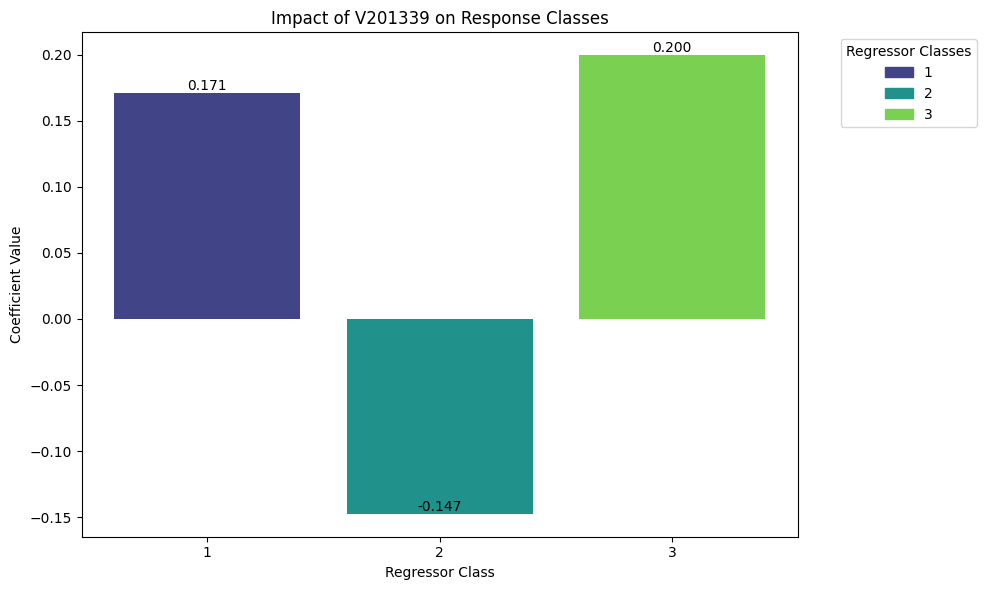

In [ ]:
# Impact of V201139 on Pref_Party

V201139_c = {'1': 0.171341, '2': -0.147408,'3': 0.199532}



# Creating a dataframe from the coefficients
V201139_df = pd.DataFrame(list(V201139_c.items()), columns=['Regressor Class', 'Coefficient'])

# Creating a color map
colors = plt.cm.viridis([0.2, 0.5, 0.8])

# Plotting a grouped bar chart with a legend
plt.figure(figsize=(10, 6))
bars = plt.bar(V201139_df['Regressor Class'], V201139_df['Coefficient'], color=colors)

# Adding value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom')

# Adding a legend manually
from matplotlib.patches import Patch
legend_patches = [Patch(color=colors[i], label=V201139_df['Regressor Class'][i]) for i in range(len(V201139_df))]
plt.legend(handles=legend_patches, title="Regressor Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customizing the plot
plt.title('Impact of V201339 on Response Classes')
plt.xlabel('Regressor Class')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-126-2f7f1dc6d8b2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  imm_ratio = df_Party.groupby(['Pref_Party', 'V201139']).size().unstack(fill_value=0)


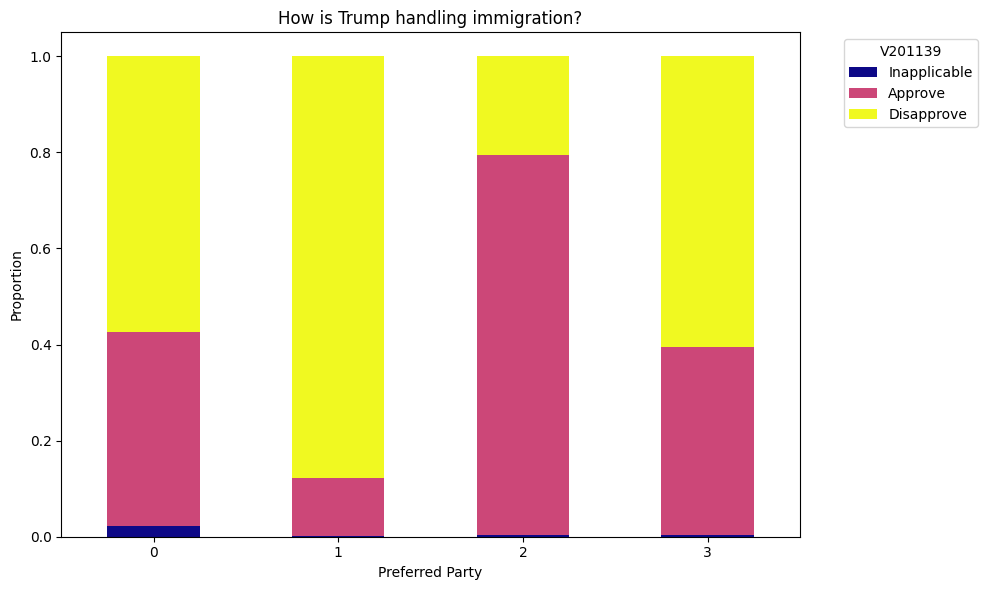

In [ ]:
# Compute the ratio of each V201139 class within each response class
imm_ratio = df_Party.groupby(['Pref_Party', 'V201139']).size().unstack(fill_value=0)

imm_ratio = imm_ratio.div(imm_ratio.sum(axis=1), axis=0)

imm_ratio.reset_index(inplace=True)

# Pref_Party set as the as x-axis
imm_ratio.plot(x='Pref_Party', kind='bar', stacked=True, figsize=(10, 6), cmap='plasma')

plt.title('How is Trump handling immigration?')
plt.xlabel('Preferred Party')
plt.ylabel('Proportion')
plt.legend(title='V201139', bbox_to_anchor=(1.05, 1), loc='upper left')

# Custom legend labels
custom_labels = ['Inapplicable', 'Approve', 'Disapprove']
plt.legend(title='V201139', labels=custom_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


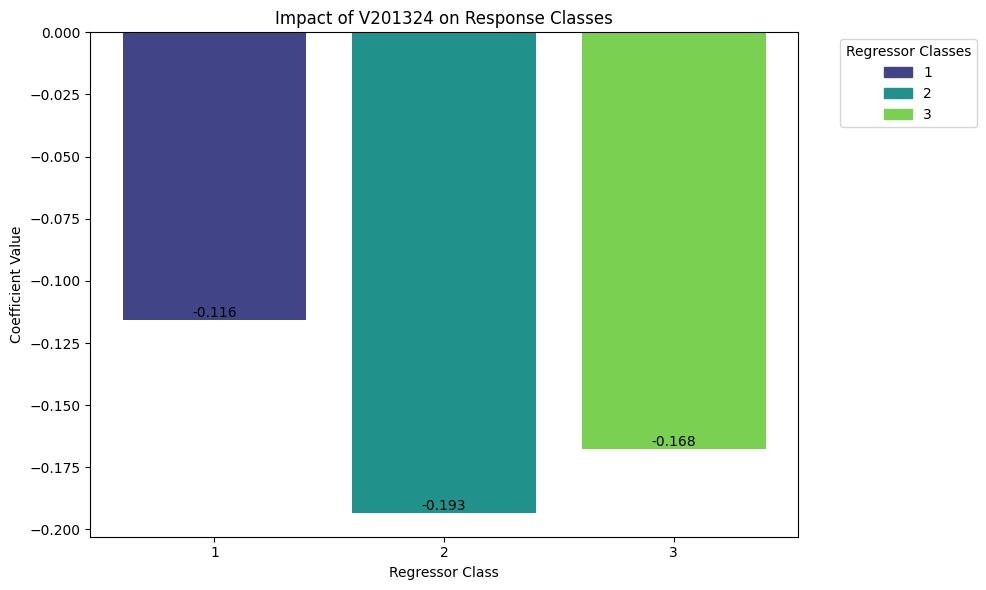

In [ ]:
# Show the impact of V201324 on Pref_Party

V201324_c = {'1': -0.115800, '2': -0.193250,'3': -0.167780}


V201324_df = pd.DataFrame(list(V201324_c.items()), columns=['Regressor Class', 'Coefficient'])


colors = plt.cm.viridis([0.2, 0.5, 0.8])

# Plotting a grouped bar chart with a legend
plt.figure(figsize=(10, 6))
bars = plt.bar(V201324_df['Regressor Class'], V201324_df['Coefficient'], color=colors)

# Adding value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom')

# Adding a legend manually
from matplotlib.patches import Patch
legend_patches = [Patch(color=colors[i], label=V201324_df['Regressor Class'][i]) for i in range(len(V201324_df))]
plt.legend(handles=legend_patches, title="Regressor Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customizing the plot
plt.title('Impact of V201324 on Response Classes')
plt.xlabel('Regressor Class')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-123-a5e834c0fbdb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  economy_state_ratio = df_Party.groupby(['Pref_Party', 'V201324']).size().unstack(fill_value=0)


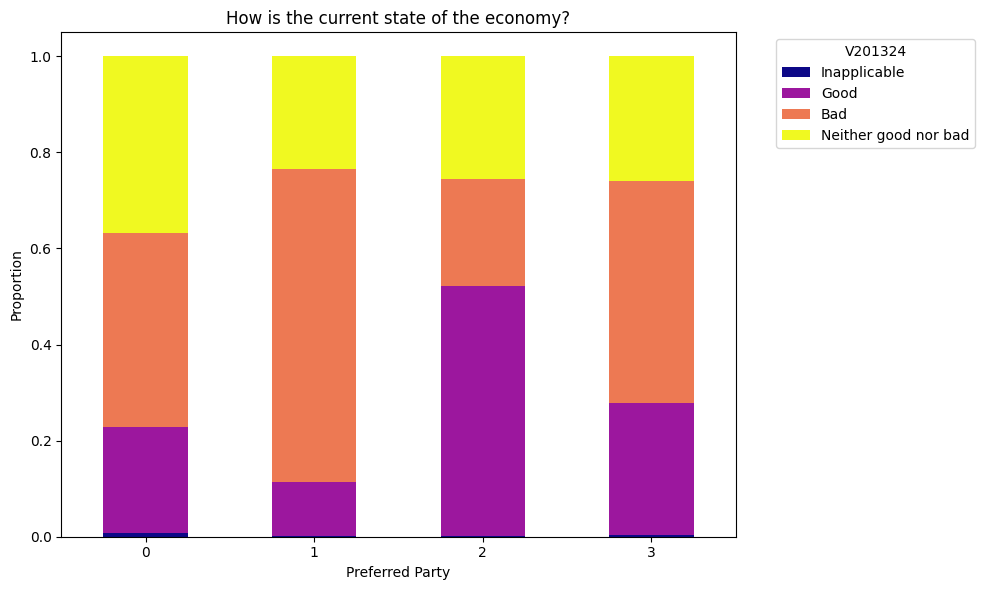

In [ ]:
# Compute the ratio of each V201324 class within each response class
economy_state_ratio = df_Party.groupby(['Pref_Party', 'V201324']).size().unstack(fill_value=0)

# Convert counts to proportions (row-wise normalization)
economy_state_ratio = economy_state_ratio.div(economy_state_ratio.sum(axis=1), axis=0)

# Reset index for proper plotting
economy_state_ratio.reset_index(inplace=True)

# Pref_Party set as the as x-axis
economy_state_ratio.plot(x='Pref_Party', kind='bar', stacked=True, figsize=(10, 6), cmap='plasma')

plt.title('How is the current state of the economy?')
plt.xlabel('Preferred Party')
plt.ylabel('Proportion')
plt.legend(title='V201324', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

custom_labels = ['Inapplicable', 'Good', 'Bad', 'Neither good nor bad']
plt.legend(title='V201324', labels=custom_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


#### Multivariate logistic regression for *df_President*

In [ ]:
df_President['Pref_President'] = pd.Categorical(df_President['Pref_President'], categories=[0, 1, 2, 3], ordered=True)
# setting 'inapplicable' (class 0) as the baseline
# this way, the model would assess how the other classes differ from those who did not respond

X2 = df_President.drop('Pref_President', axis=1)
y2 = df_President['Pref_President']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Standardize the regressors so they have zero mean and variance = 1
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

# Add the intercept beta0
X2_train = sm.add_constant(X2_train)

# Train multivariate logistic regression using the training data
model = sm.MNLogit(y2_train, X2_train)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.567720
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:         Pref_President   No. Observations:                 6624
Model:                        MNLogit   Df Residuals:                     6537
Method:                           MLE   Df Model:                           84
Date:                Thu, 09 Jan 2025   Pseudo R-squ.:                  0.4801
Time:                        21:08:20   Log-Likelihood:                -3760.6
converged:                       True   LL-Null:                       -7233.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
Pref_President=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3682      0.070      5.268      0.000       0.231       0.505
x1         

In [ ]:
# Evaluate model performance using classification report (only reflects the test test)
X2_test = sm.add_constant(X2_test)  # add a constant to the test set
y2_pred_prob = result.predict(X2_test)  # get the predicted probabilities
y2_pred = np.argmax(y2_pred_prob, axis=1)  # get the predicted class by taking the max probability for each row
print("Classification Report:")
print(classification_report(y2_test, y2_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.07      0.13       207
           1       0.82      0.95      0.88       777
           2       0.81      0.96      0.88       611
           3       0.00      0.00      0.00        61

    accuracy                           0.81      1656
   macro avg       0.53      0.50      0.47      1656
weighted avg       0.74      0.81      0.75      1656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


* Class 0 -> The model has a precision of 47%, meaning it is 47% correct when predicting class 0. However, its 7% recall indicates that the model only detects 7% of all the actual class 0 instances.
* Class 1 -> The model has a precision of 82%, meaning it is 82% correct when predicting this class. It also correctly identifies 95% of the actual class 1 observations, showing a strong ability to identify voters who prefer Biden. The high F1-score of 0.88 suggests a solid balance between precision and recall for this category, indicating the model is effective at distinguishing Biden supporters.
* Class 2 -> The model has a precision of 81%, meaning it is 81% correct when predicting class 2. It correctly identifies 96% of the actual class 2 observations, suggesting that the model is extremely good at detecting Trump supporters. The strong F1-score of 0.88 confirms that the model distinguishes Trump supporters very well.
* Class 3 -> The model fails to predict any observations for this class, with a precision, recall, and F1-score of 0. This suggests the model is struggling with class 3, likely due to class imbalance, as this category is rare.

Since we are more interested in the more frequent classes (`Pref_President = 'Joe Biden'` and `Pref_President = 'Donal Trump'`), it is encouraging to see that the weighted average recall is 81%, and the weighted average F1-score is 75%. These metrics suggest that the model is performing well overall, as they give more weight to the larger, more frequent classes (1 and 2).






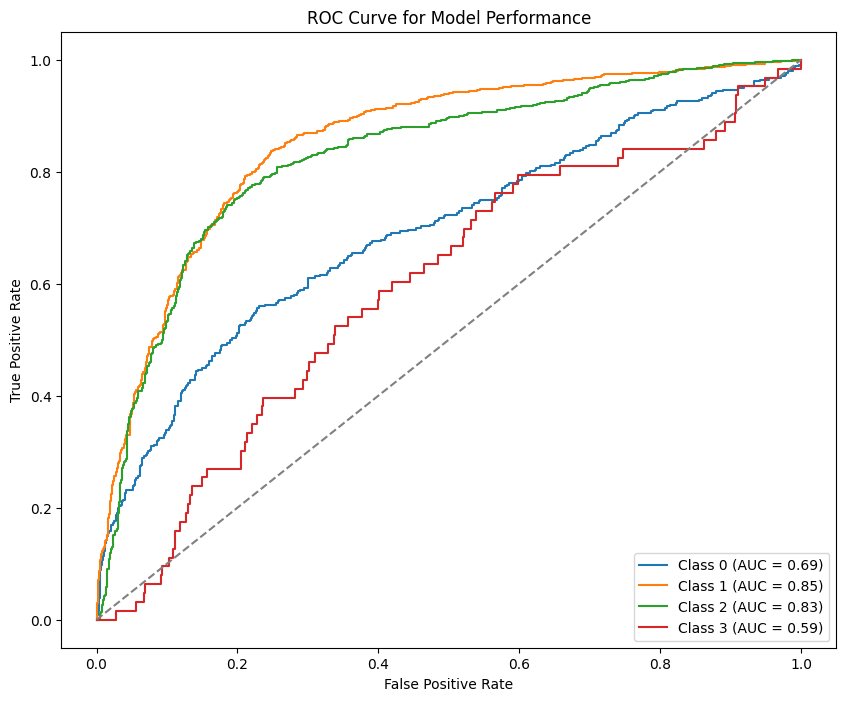

In [ ]:
# Let's compute the ROC curve

# Predict probabilities on test set
y_prob = result.predict(X2_test)

# Binarize the target for ROC curve computation
y2_test_bin = label_binarize(y2_test, classes=[0, 1, 2, 3])

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y2_test_bin.shape[1]

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y1_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the baseline diagonal
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model Performance')
plt.legend(loc="lower right")
plt.show()

The results above confirm the findings from the classification report: the model performs well in distinguishing observations from classes 1 (AUC = 0.85) and 2 (AUC = 0.83). For class 0, the performance is fairly strong (AUC = 0.69) but not as strong as for classes 1 and 2. However, for class 3, the model struggles to distinguish this class from the others, with performance only slightly better than random guessing (AUC = 0.59).

In [ ]:
# The following results represent the probabilities of each observation (row) in df_President belonging to each of the three response classes

name_mapping = {'x1':'State_cod', 'x2':'V201016', 'x3':'V201130', 'x4':'V201133', 'x5':'V201136', 'x6':'V201139', 'x7':'V201142',
                'x9':'V201303', 'x10':'V201306', 'x11':'V201309', 'x13':'V201318', 'x14':'V201321', 'x15':'V201324',
                'x16':'V201328', 'x19':'V201351', 'x20':'V201351', 'x21':'V201352', 'x22':'V201360', 'x23':'V201377', 'x24':'V201380',
                'x25':'V201554', 'x27':'V201603', 'x28':'V201617x'}

# Significant predictors for each class based on p-values < 0.5
significant_vars_class1 = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x9', 'x14', 'x22', 'x24', 'x28']
significant_vars_class2 = ['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x10', 'x13', 'x15', 'x19', 'x20', 'x24', 'x28']


# Retrieve the indices of the significant variables in df_President
significant_vars_class1_indices = [list(df_President.columns).index(name_mapping[var]) for var in significant_vars_class1]
significant_vars_class2_indices = [list(df_President.columns).index(name_mapping[var]) for var in significant_vars_class2]

# Now, use the indices to access the data in the NumPy array
X_significant_class1 = X2_train[:, significant_vars_class1_indices]
X_significant_class2 = X2_train[:, significant_vars_class2_indices]

# Calculate log-odds for each class using the significant variables
#The line below is changed to select the correct parameters from result.params based on the significant variables for each class
log_odds_1 = result.params[1][significant_vars_class1_indices] @ X_significant_class1.T  # Log-odds for class 1
log_odds_2 = result.params[2][significant_vars_class2_indices] @ X_significant_class2.T  # Log-odds for class 2
#log_odds_3 = result.params[0][significant_vars_class3_indices] @ X_significant_class3.T  # Log-odds for class 3

# Stack the log-odds for the three classes together, including a baseline for Pref_Party=0 ('Inapplicable')
log_odds_all = np.column_stack([np.zeros(X_significant_class1.shape[0]), log_odds_1, log_odds_2])

# Apply the 'softmax' function to compute probabilities for each class
exp_log_odds = np.exp(log_odds_all)
probabilities = exp_log_odds / np.sum(exp_log_odds, axis=1, keepdims=True)

# Probabilities for Pref_Party=1 and Pref_Party=2
print(f"Pref_President=1, Pref_President=2:\n{probabilities[:, 1:]}")
# We can identify the most likely class for each observation by looking at which column (class) has the highest probability

Pref_President=1, Pref_President=2:
[[0.72046572 0.08645491]
 [0.71156415 0.11843554]
 [0.21403944 0.47694075]
 ...
 [0.98885864 0.00138037]
 [0.10616128 0.48664748]
 [0.65749662 0.13148196]]


<ipython-input-121-1fa282287a7e>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  log_odds_1 = result.params[1][significant_vars_class1_indices] @ X_significant_class1.T  # Log-odds for class 1
<ipython-input-121-1fa282287a7e>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  log_odds_2 = result.params[2][significant_vars_class2_indices] @ X_significant_class2.T  # Log-odds for class 2


In [ ]:
# Now, we can compute how many observations are likely to fall into each of the three classes

# First of all, we have to identify the class with the highest probability for each observation (excluding the baseline)
predicted_classes = np.argmax(probabilities[:, 1:], axis=1) + 1  # '+1' to match the class labels

# Count how many observations fall into each class
class_labels = [1, 2]
counts = [np.sum(predicted_classes == label) for label in class_labels]

# Display the count for each class in the specified order
for class_label, count in zip(class_labels, counts):
    print(f"Class {class_label}: {count} observations")

Class 1: 2978 observations
Class 2: 3646 observations


In [ ]:
count_class_2 = (df_President['Pref_President'] == 2).sum()
count_class_1 = (df_President['Pref_President'] == 1).sum()
print(f"Number of observations where Pref_President = 1: {count_class_1}")
print(f"Number of observations where Pref_President = 2: {count_class_2}")

Number of observations where Pref_President = 1: 3843
Number of observations where Pref_President = 2: 3151


In [ ]:
# Show only the significant variables for which the p-value < 0.05

significant_vars = {}

for category in result.pvalues.columns:
    significant_vars[category + 1] = result.pvalues[result.pvalues[category] < 0.05].index.tolist()

for category, v in significant_vars.items():
    print(f"\nSignificant variables for class {category}: {v}")


Significant variables for class 1: ['const', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x9', 'x14', 'x22', 'x24', 'x28']

Significant variables for class 2: ['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x10', 'x13', 'x15', 'x19', 'x20', 'x24', 'x28']

Significant variables for class 3: ['const', 'x1', 'x2', 'x7', 'x21', 'x24']


It seems that, for Joe Biden supporters, the most significant variables are: *State_cod*, *V201016* (*x2*, duration of registration), *V201130* (*x3*, how Trump is handling the US economy), *V201133* (x4, How Trump is handling foreign relations) , *V201136* (*x5*, how Trump is handling healthcare), *V201139* (*x6*, how Trump is handling immigration), *V201142* (*x7*, how Trump is handling the pandemic), *V201303* (*x9*, federal spending on public schools), *V201321* (*x14*, federal spending on protecting the environment), *V201360* (*x22*, allowing convicted felons to vote once their sentence is completed), *V201380* (*x24*, if the level of corruction increased or decreased since Trump), and *V201617x* (total family income).

On the other hand, for partcipants who support Donald Trump, the most significant inputs are: *V201016* (*x2*, duration of registration), *V201130* (*x3*, how Trump is handling the US economy), *V201133* (*x4*, How Trump is handling foreign relations), *V201136* (*x5*, how Trump is handling healthcare), *V201139* (*x6*, how Trump is handling immigration), *V201142* (*x7*, how Trump is handling the pandemic), *V201306* (*x10*, federal spending on tightening border security), *V201318* (*x13*, federal spending on aid to the poor), *V201324* (x15, current state of the economy), *V201350* (*x19*, whether spending in solving international problems should be increased or decreased), *V201351* (*x20*, whethere the votes will be counted accurately), *V201380* (*x24*, has corruption increased or decreased since Trump?), and V201617x (total family income).

In [ ]:
print(result.params)

              0         1         2
const  0.368229 -0.026511 -1.405492
x1    -0.103243  0.023562 -0.160179
x2     0.365578  0.299688  0.249045
x3     0.251886 -0.552083 -0.069061
x4     0.363412 -0.442825  0.095998
x5     0.293270 -0.258167  0.175982
x6     0.304333 -0.263395  0.203216
x7     0.523926 -0.340219 -0.261504
x8     0.043735 -0.044551  0.098095
x9    -0.149428 -0.045134 -0.072126
x10   -0.024211 -0.223396  0.107456
x11    0.073751 -0.014991  0.124781
x12    0.086937  0.101524 -0.017654
x13   -0.020670  0.193100  0.056569
x14   -0.121563  0.095192 -0.070317
x15   -0.077702 -0.142733 -0.149592
x16    0.053168 -0.066535  0.076674
x17    0.054688 -0.054941  0.074149
x18   -0.020683 -0.079525 -0.050769
x19    0.025411  0.109186  0.150968
x20    0.042377  0.228624  0.126503
x21   -0.054305  0.069689  0.308559
x22   -0.147860  0.009057 -0.151918
x23   -0.079380  0.004583  0.055280
x24   -0.283584  0.289000  0.200678
x25    0.008776 -0.047917 -0.071594
x26   -0.009391  0.031344 -0

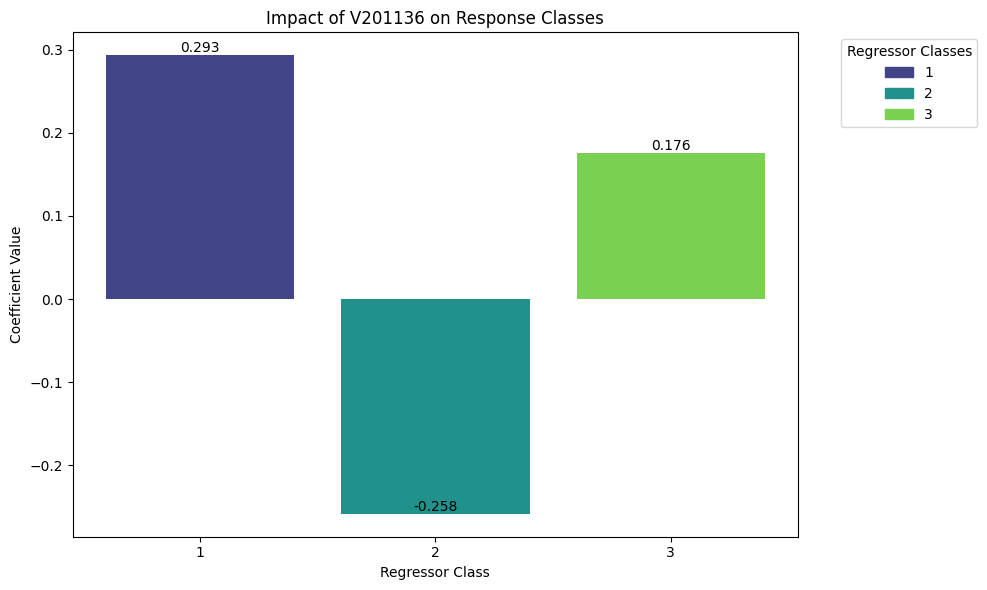

In [ ]:
# Show the impact of V201136 on Pref_President

V201136_c = {'1': 0.293270, '2': -0.258167,'3': 0.175982}


V201136_df = pd.DataFrame(list(V201136_c.items()), columns=['Regressor Class', 'Coefficient'])


colors = plt.cm.viridis([0.2, 0.5, 0.8])

# Plotting a grouped bar chart with a legend
plt.figure(figsize=(10, 6))
bars = plt.bar(V201136_df['Regressor Class'], V201136_df['Coefficient'], color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom')

from matplotlib.patches import Patch
legend_patches = [Patch(color=colors[i], label=V201136_df['Regressor Class'][i]) for i in range(len(V201136_df))]
plt.legend(handles=legend_patches, title="Regressor Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customizing the plot
plt.title('Impact of V201136 on Response Classes')
plt.xlabel('Regressor Class')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-129-0537b05d2d3f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  healthcare_ratio = df_President.groupby(['Pref_President', 'V201136']).size().unstack(fill_value=0)


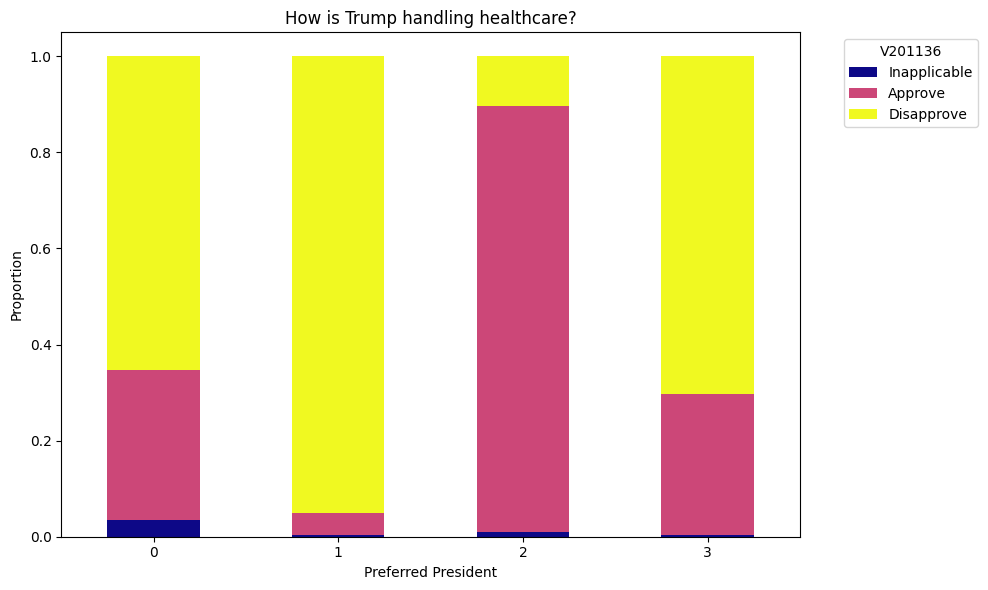

In [ ]:
# Compute the ratio of each V201136 class within each response class
healthcare_ratio = df_President.groupby(['Pref_President', 'V201136']).size().unstack(fill_value=0)

# Convert counts to proportions (row-wise normalization)
healthcare_ratio = healthcare_ratio.div(healthcare_ratio.sum(axis=1), axis=0)

# Reset index for proper plotting
healthcare_ratio.reset_index(inplace=True)

# Pref_Party set as the as x-axis
healthcare_ratio.plot(x='Pref_President', kind='bar', stacked=True, figsize=(10, 6), cmap='plasma')

plt.title('How is Trump handling healthcare?')
plt.xlabel('Preferred President')
plt.ylabel('Proportion')
plt.legend(title='V201136', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

custom_labels = ['Inapplicable', 'Approve', 'Disapprove']
plt.legend(title='V201136', labels=custom_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

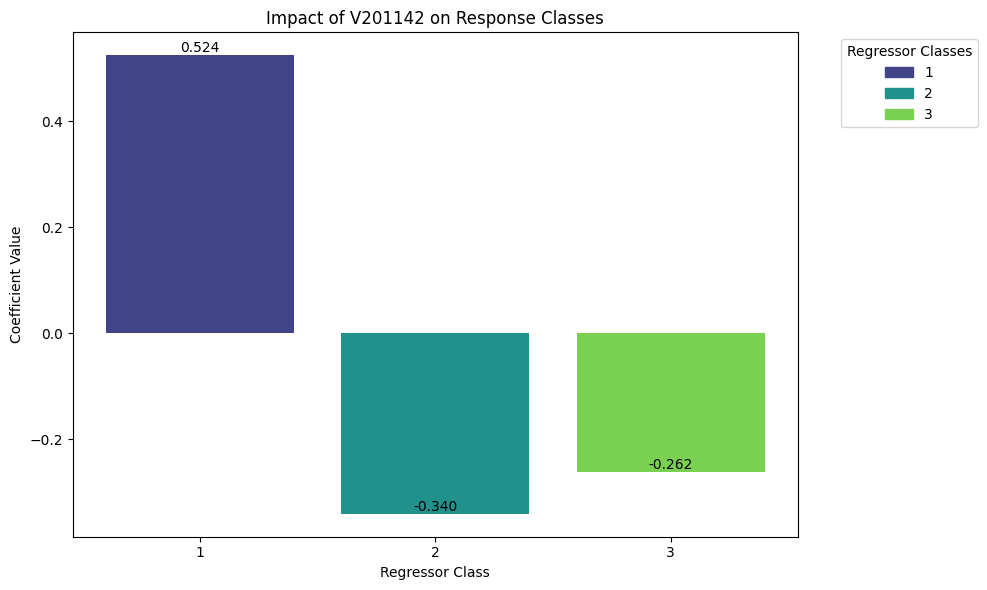

In [ ]:
# Show the impact of V201142 on Pref_President

V201142_c = {'1': 0.523926, '2': -0.340219,'3': -0.261504}


V201142_df = pd.DataFrame(list(V201142_c.items()), columns=['Regressor Class', 'Coefficient'])


colors = plt.cm.viridis([0.2, 0.5, 0.8])

# Plotting a grouped bar chart with a legend
plt.figure(figsize=(10, 6))
bars = plt.bar(V201142_df['Regressor Class'], V201142_df['Coefficient'], color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom')

from matplotlib.patches import Patch
legend_patches = [Patch(color=colors[i], label=V201142_df['Regressor Class'][i]) for i in range(len(V201142_df))]
plt.legend(handles=legend_patches, title="Regressor Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customizing the plot
plt.title('Impact of V201142 on Response Classes')
plt.xlabel('Regressor Class')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=0)
plt.tight_layout()

<ipython-input-134-c44649a306f1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pan_ratio = df_President.groupby(['Pref_President', 'V201142']).size().unstack(fill_value=0)


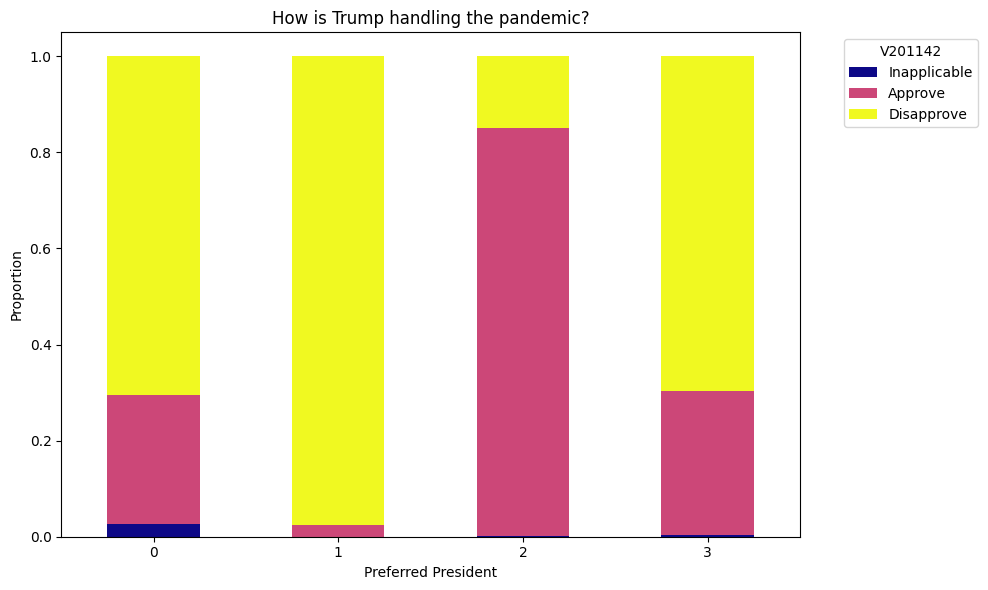

In [ ]:
# Compute the ratio of each V201142 class within each response class
pan_ratio = df_President.groupby(['Pref_President', 'V201142']).size().unstack(fill_value=0)

# Convert counts to proportions (row-wise normalization)
pan_ratio = pan_ratio.div(pan_ratio.sum(axis=1), axis=0)

# Reset index for proper plotting
pan_ratio.reset_index(inplace=True)

# Pref_Party set as the as x-axis
pan_ratio.plot(x='Pref_President', kind='bar', stacked=True, figsize=(10, 6), cmap='plasma')

plt.title('How is Trump handling the pandemic?')
plt.xlabel('Preferred President')
plt.ylabel('Proportion')
plt.legend(title='V201142', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

custom_labels = ['Inapplicable', 'Approve', 'Disapprove']
plt.legend(title='V201142', labels=custom_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Defining the number of partecipants per State

In this section we are going to apply the 'groupby' function to determine the number of participants per State that took part in the questionnaire. This step is important to remember that our findings are influenced by the random sample of selected voters.

In [ ]:
import plotly.express as px

# Grouping to count the participants per State
data_grouped = df.groupby(['State_cod']).count()
data_grouped
number=data_grouped.reset_index()

# Plotly needs State abbreviations > does not work with full names
state_mapping = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE',
    11: 'DC', 12: 'FL', 13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA',
    20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN',
    28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH', 34: 'NJ', 35: 'NM',
    36: 'NY', 37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI',
    45: 'SC', 46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA', 53: 'WA',
    54: 'WV', 55: 'WI', 56: 'WY'
}

number['State']=number['State_cod'].map(state_mapping)
number=number.rename(columns={'V201300':'Participants'})
# number

fig = px.choropleth(
    number,
    locations='State',  # Use the state abbreviations
    locationmode='USA-states',  # Match US states
    color='Participants',  # Color by voter count (assuming V201300 contains this data)
    scope='usa',  # Focus on the USA
    color_continuous_scale='OrRd',  # Use a red-to-orange color map
    )

fig.update_layout(
    title={
        'text': "State-wise 2020 Presidential Election Questionnaire Participants",
        'font': {
            'size': 24,  # Adjust the font size as needed
            'color': 'black'  # Set the title color to black
        },
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title at the center
    }
)

# Display the map
fig.show()
